In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/peytonbailey/WGU Data Science Masters/D600- Statistical Data Mining/Task 2/D600 Task 2 Dataset 1 Housing Information (1).csv')

In [3]:
print(df.columns)
pd.options.display.float_format = '{:,.2f}'.format

Index(['ID', 'Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms',
       'BackyardSpace', 'CrimeRate', 'SchoolRating', 'AgeOfHome',
       'DistanceToCityCenter', 'EmploymentRate', 'PropertyTaxRate',
       'RenovationQuality', 'LocalAmenities', 'TransportAccess', 'Fireplace',
       'HouseColor', 'Garage', 'Floors', 'Windows', 'PreviousSalePrice',
       'IsLuxury'],
      dtype='object')


In [4]:
print(df['Price'].describe())
pd.reset_option('display.float_format')
print(df['SquareFootage'].describe())
print(df['RenovationQuality'].describe())

count       7,000.00
mean      307,281.97
std       150,173.43
min        85,000.00
25%       192,107.53
50%       279,322.95
75%       391,878.13
max     1,046,675.64
Name: Price, dtype: float64
count    7000.000000
mean     1048.947459
std       426.010482
min       550.000000
25%       660.815000
50%       996.320000
75%      1342.292500
max      2874.700000
Name: SquareFootage, dtype: float64
count    7000.000000
mean        5.003357
std         1.970428
min         0.010000
25%         3.660000
50%         5.020000
75%         6.350000
max        10.000000
Name: RenovationQuality, dtype: float64


In [ ]:

print(df['NumBathrooms'].describe())
print(df['NumBedrooms'].describe())

count    7000.000000
mean        2.131397
std         0.952561
min         1.000000
25%         1.290539
50%         1.997774
75%         2.763997
max         5.807239
Name: NumBathrooms, dtype: float64
count    7000.000000
mean        3.008571
std         1.021940
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: NumBedrooms, dtype: float64


In [6]:
lux_counts = df['IsLuxury'].value_counts()
lux_ratios = df['IsLuxury'].value_counts(normalize=True) 

# Create summary table
lux_summary_table = pd.DataFrame({'Frequency': lux_counts, 'Ratios': lux_ratios})

print(lux_summary_table)

          Frequency  Ratios
IsLuxury                   
1              3528   0.504
0              3472   0.496


In [ ]:
garage_counts = df['Garage'].value_counts()
garage_ratios = df['Garage'].value_counts(normalize=True) 

# Create summary table
garage_summary_table = pd.DataFrame({'Frequency': garage_counts, 'Ratios': garage_ratios})

print(garage_summary_table)

        Frequency    Ratios
Garage                     
No           4488  0.641143
Yes          2512  0.358857


In [ ]:
fire_counts = df['Fireplace'].value_counts()
fire_ratios = df['Fireplace'].value_counts(normalize=True) 

# Create summary table
fire_summary_table = pd.DataFrame({'Frequency': fire_counts, 'Ratios': fire_ratios})

print(fire_summary_table)

           Frequency    Ratios
Fireplace                     
No              5172  0.738857
Yes             1828  0.261143


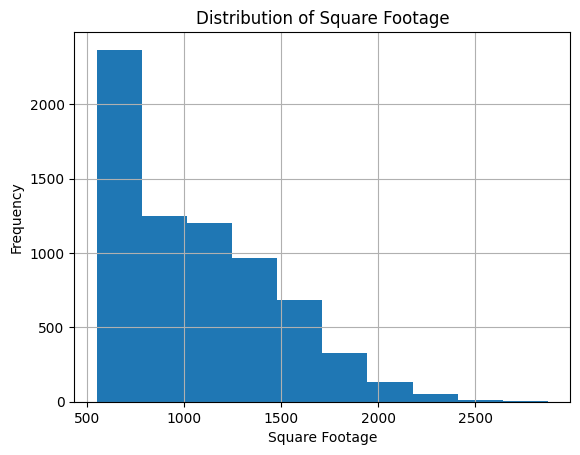

In [9]:
ax = df['SquareFootage'].hist()
ax.set_title('Distribution of Square Footage')
ax.set_xlabel('Square Footage')
ax.set_ylabel('Frequency')
plt.show()

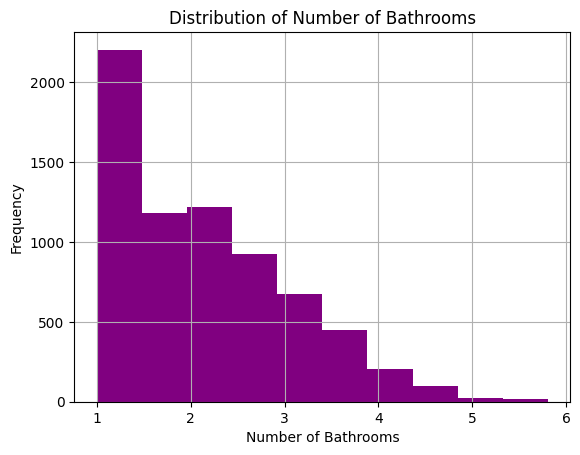

In [10]:
ax = df['NumBathrooms'].hist(color='purple')
ax.set_title('Distribution of Number of Bathrooms')
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Frequency')
plt.show()

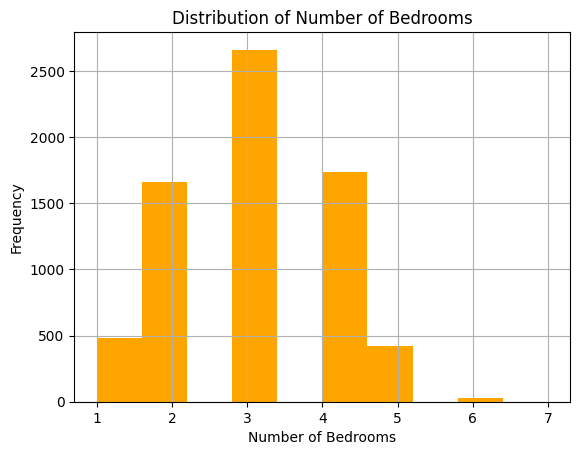

In [11]:
ax = df['NumBedrooms'].hist(color='orange')
ax.set_title('Distribution of Number of Bedrooms')
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Frequency')
plt.show()

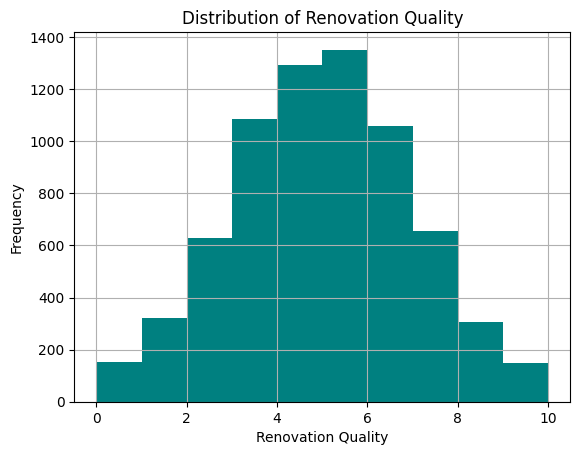

In [12]:
ax = df['RenovationQuality'].hist(color='teal')
ax.set_title('Distribution of Renovation Quality')
ax.set_xlabel('Renovation Quality')
ax.set_ylabel('Frequency')
plt.show()

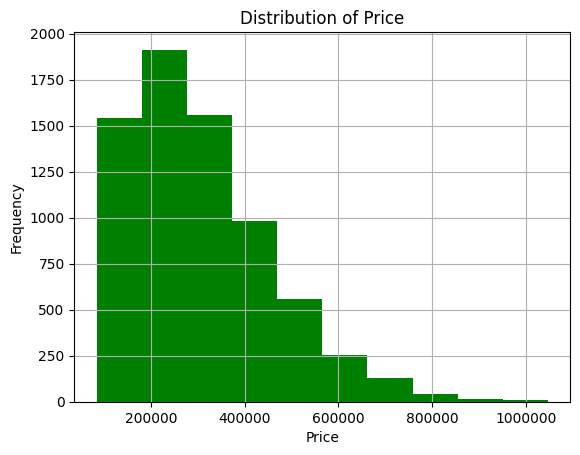

In [13]:
ax = df['Price'].hist(color='green')
ax.set_title('Distribution of Price')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

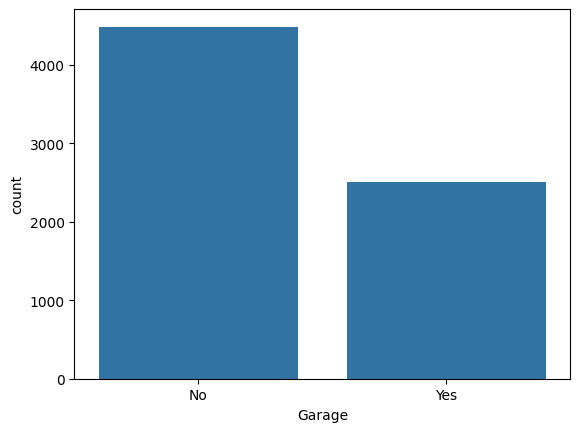

In [14]:
sns.countplot(x ='Garage', data = df)
plt.show()

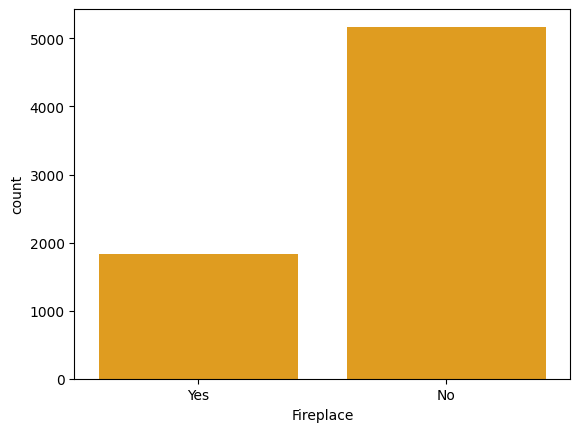

In [15]:
sns.countplot(x ='Fireplace', data = df, color = 'orange')
plt.show()

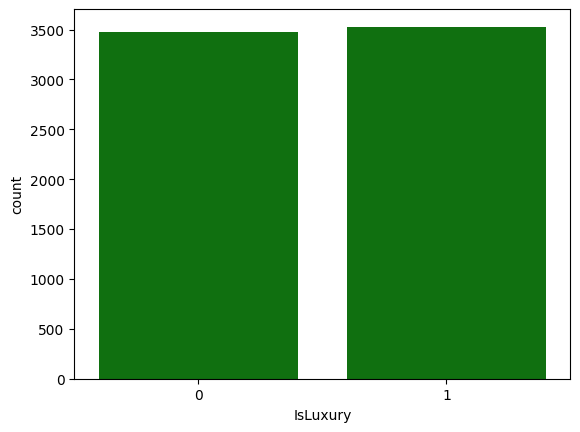

In [16]:
sns.countplot(x ='IsLuxury', data = df, color = 'green')
plt.show()

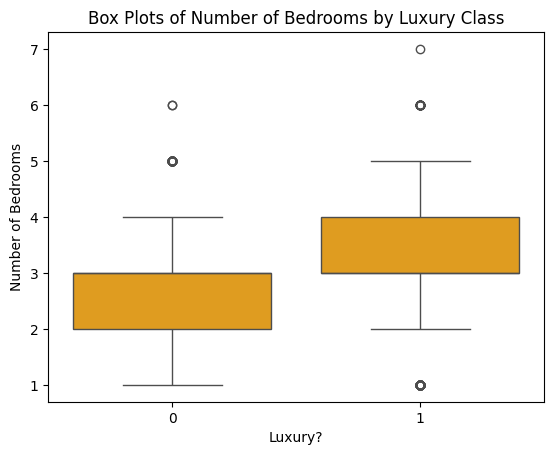

In [17]:
sns.boxplot(x='IsLuxury', y='NumBedrooms', data=df, color='orange')

plt.xlabel('Luxury?')
plt.ylabel('Number of Bedrooms')
plt.title('Box Plots of Number of Bedrooms by Luxury Class')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

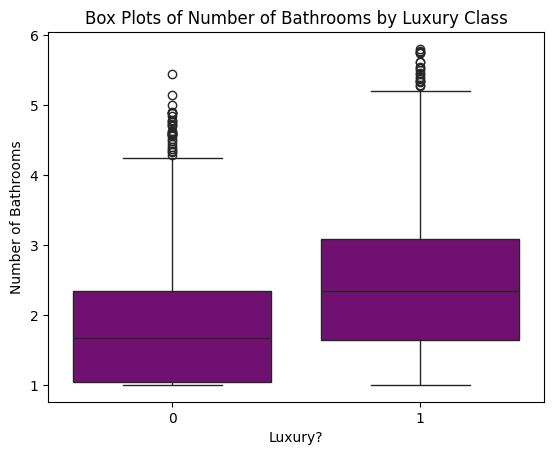

In [18]:
sns.boxplot(x='IsLuxury', y='NumBathrooms', data=df, color='purple')
plt.xlabel('Luxury?')
plt.ylabel('Number of Bathrooms')
plt.title('Box Plots of Number of Bathrooms by Luxury Class')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

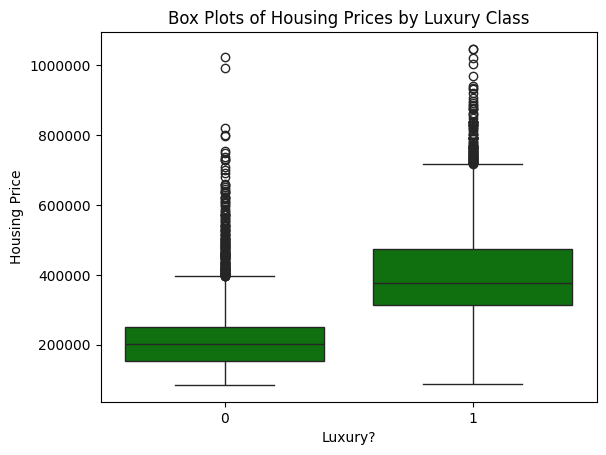

In [19]:
sns.boxplot(x='IsLuxury', y='Price', data=df, color='green')
plt.xlabel('Luxury?')
plt.ylabel('Housing Price')
plt.title('Box Plots of Housing Prices by Luxury Class')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

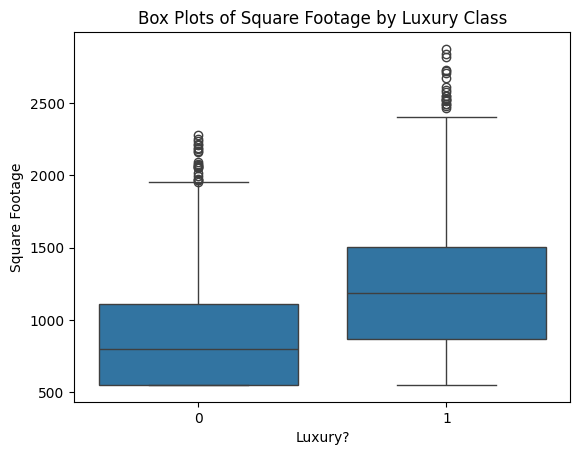

In [20]:
sns.boxplot(x='IsLuxury', y='SquareFootage', data=df)

plt.xlabel('Luxury?')
plt.ylabel('Square Footage')
plt.title('Box Plots of Square Footage by Luxury Class')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

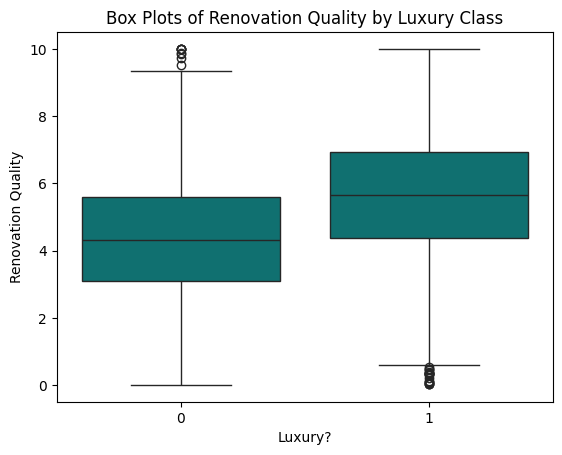

In [21]:
sns.boxplot(x='IsLuxury', y='RenovationQuality', data=df, color='teal')
plt.xlabel('Luxury?')
plt.ylabel('Renovation Quality')
plt.title('Box Plots of Renovation Quality by Luxury Class')
plt.ticklabel_format(style='plain', axis='y')


Garage      No   Yes
IsLuxury            
0         2225  1247
1         2263  1265


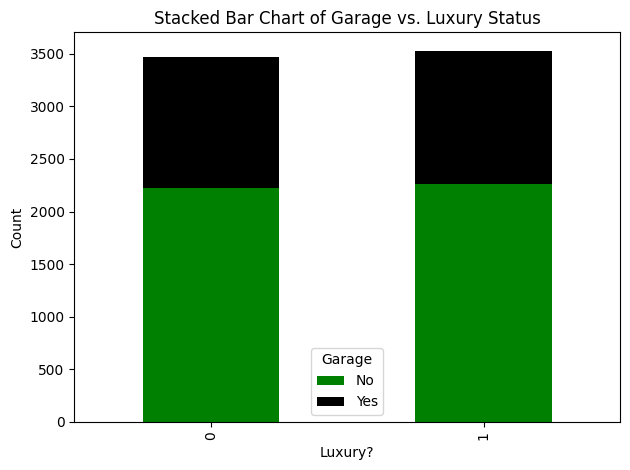

In [22]:

# Create a crosstab of Garage and IsLuxury
garage_luxury_counts = pd.crosstab(df['IsLuxury'], df['Garage'])
print(garage_luxury_counts)
# Plot the stacked bar chart
garage_luxury_counts.plot(kind='bar', stacked=True, color=['green', 'black'])
plt.xlabel('Luxury?')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Garage vs. Luxury Status')
plt.legend(title='Garage', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


Fireplace    No  Yes
IsLuxury            
0          2531  941
1          2641  887


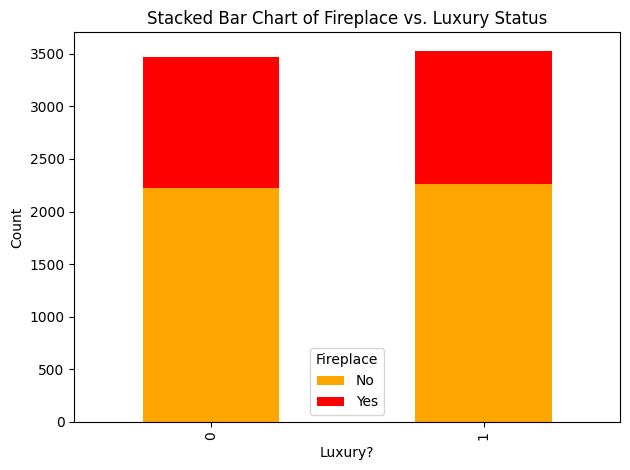

In [23]:
fireplace_luxury_counts = pd.crosstab(df['IsLuxury'], df['Fireplace'])
print(fireplace_luxury_counts)
# Plot the stacked bar chart
garage_luxury_counts.plot(kind='bar', stacked=True, color=['orange', 'red'])
plt.xlabel('Luxury?')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Fireplace vs. Luxury Status')
plt.legend(title='Fireplace', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [24]:

df = pd.get_dummies(df, columns=['Garage','Fireplace','IsLuxury'], drop_first=True)





In [25]:
df.columns
df['Garage_Yes'] = df['Garage_Yes'].astype(int)
df['IsLuxury_1'] = df['IsLuxury_1'].astype(int)
df['Fireplace_Yes'] = df['Fireplace_Yes'].astype(int)
print(df.head())

     ID        Price  SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace  \
0  4922  255614.8992         566.62      1.000000            4         779.42   
1  5009  155586.0947        1472.34      1.000000            2         656.13   
2  4450  131050.8324         550.00      1.779354            3         754.57   
3  1070  151361.7125         941.81      2.035254            2         439.59   
4   400  113167.6128         550.00      1.064644            3         353.03   

   CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  ...  \
0      20.56          5.62      39.46                 10.08  ...   
1      15.62          5.63      40.51                  7.89  ...   
2      12.47          9.20      48.38                 23.74  ...   
3      22.22          7.08      94.67                  5.22  ...   
4       8.28          5.93      16.80                 43.13  ...   

   RenovationQuality  LocalAmenities  TransportAccess  HouseColor  Floors  \
0               4.93       

In [ ]:
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score

X= df[['Price','SquareFootage', 'NumBathrooms', 'NumBedrooms', 'RenovationQuality', 'Garage_Yes', 'Fireplace_Yes']]
y= df['IsLuxury_1']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
train_df.to_csv('training_data_task2.csv', index=False)
test_df.to_csv('testing_data_task2.csv', index=False)

# Add constant for intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)



In [27]:
# Fit initial model
initial_model = sm.Logit(y_train, X_train_const).fit()
print(initial_model.summary())




Optimization terminated successfully.
         Current function value: 0.422183
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             IsLuxury_1   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5592
Method:                           MLE   Df Model:                            7
Date:                Sun, 27 Apr 2025   Pseudo R-squ.:                  0.3909
Time:                        15:34:14   Log-Likelihood:                -2364.2
converged:                       True   LL-Null:                       -3881.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.0383      0.187    -26.949      0.000      -5.405      -4.672
Price   

In [28]:
# Extract parameters
def extract_params(model):
    print("AIC:", model.aic)
    print("BIC:", model.bic)
    print("Pseudo R²:", model.prsquared)
    print("Coefficients:\n", model.params)
    print("p-values:\n", model.pvalues)

print("Initial Model Parameters:")
extract_params(initial_model)

Initial Model Parameters:
AIC: 4744.44900730686
BIC: 4797.493182320646
Pseudo R²: 0.39089163078357547
Coefficients:
 const               -5.038298
Price                0.000015
SquareFootage        0.000190
NumBathrooms         0.037567
NumBedrooms          0.096065
RenovationQuality    0.005898
Garage_Yes          -0.029785
Fireplace_Yes        0.011919
dtype: float64
p-values:
 const                5.800889e-160
Price                3.040116e-188
SquareFootage         7.520742e-02
NumBathrooms          3.968825e-01
NumBedrooms           2.107360e-02
RenovationQuality     7.858359e-01
Garage_Yes            6.938225e-01
Fireplace_Yes         8.853670e-01
dtype: float64


In [29]:
# Remove high VIF variables iteratively
variables = list(X_train.columns)
while True:
    X_temp = X_train[variables]
    vif = pd.Series(
        [variance_inflation_factor(X_temp.values, i) for i in range(len(variables))],
        index=variables
    )
    max_vif = vif.max()
    if max_vif > 10:
        worst_vif = vif.idxmax()
        print(f"Removing {worst_vif} due to high VIF={max_vif:.2f}")
        variables.remove(worst_vif)
    else:
        break




Removing Price due to high VIF=11.38
Removing RenovationQuality due to high VIF=10.14


In [30]:
# Remove high VIF variables iteratively
variables = list(X_train.columns)
while True:
    X_temp = X_train[variables]
    vif = pd.Series(
        [variance_inflation_factor(X_temp.values, i) for i in range(len(variables))],
        index=variables
    )
    max_vif = vif.max()
    if max_vif > 10:
        worst_vif = vif.idxmax()
        print(f"Removing {worst_vif} due to high VIF={max_vif:.2f}")
        variables.remove(worst_vif)
    else:
        break


Removing Price due to high VIF=11.38
Removing RenovationQuality due to high VIF=10.14


In [31]:
# Add constant for intercept
variables_with_const = ['const'] + variables
X_train_sel = sm.add_constant(X_train[variables])

while True:
    model = sm.Logit(y_train, X_train_sel).fit(disp=0)
    pvals = model.pvalues.drop('const')
    max_p = pvals.max()
    if max_p > 0.05:
        worst = pvals.idxmax()
        print(f"Removing {worst} with p-value={max_p:.3f}")
        variables.remove(worst)
        X_train_sel = sm.add_constant(X_train[variables])
    else:
        break

# Final optimized model
optimized_model = sm.Logit(y_train, X_train_sel).fit()
print(optimized_model.summary())


Removing Fireplace_Yes with p-value=0.980
Removing Garage_Yes with p-value=0.969
Optimization terminated successfully.
         Current function value: 0.534806
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             IsLuxury_1   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5596
Method:                           MLE   Df Model:                            3
Date:                Sun, 27 Apr 2025   Pseudo R-squ.:                  0.2284
Time:                        15:34:16   Log-Likelihood:                -2994.9
converged:                       True   LL-Null:                       -3881.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.6

In [32]:
# Final optimized model
X_train_opt = sm.add_constant(X_train[variables])
optimized_model = sm.Logit(y_train, X_train_opt).fit()
print(optimized_model.summary())

print("Optimized Model Parameters:")
extract_params(optimized_model)

Optimization terminated successfully.
         Current function value: 0.534806
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             IsLuxury_1   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5596
Method:                           MLE   Df Model:                            3
Date:                Sun, 27 Apr 2025   Pseudo R-squ.:                  0.2284
Time:                        15:34:17   Log-Likelihood:                -2994.9
converged:                       True   LL-Null:                       -3881.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.6963      0.171    -33.293      0.000      -6.032      -5.361
SquareFootage     0.

In [33]:
y_train_pred_opt = (optimized_model.predict(X_train_sel) >= 0.5).astype(int)
print("Optimized Model Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_opt))
print("Optimized Model Train Accuracy:", accuracy_score(y_train, y_train_pred_opt))

Optimized Model Train Confusion Matrix:
 [[2117  661]
 [ 730 2092]]
Optimized Model Train Accuracy: 0.7516071428571428


In [34]:
X_test_const.head()


,const,Price,SquareFootage,NumBathrooms,NumBedrooms,RenovationQuality,Garage_Yes,Fireplace_Yes
2286,1.0,147113.2338,894.95,1.344164,2,0.57,0,0
4540,1.0,282668.3447,566.80,1.027535,4,4.22,1,1
2194,1.0,179713.0449,550.00,1.104789,3,0.61,1,0
1351,1.0,148852.0295,1011.74,1.000000,3,7.69,0,1
5716,1.0,501338.3363,1696.32,1.163625,5,8.80,0,0


In [35]:
y_test.head()
X_test = sm.add_constant(X_test[variables])

In [36]:
y_test_pred = optimized_model.predict(X_test)
y_test_pred_opt = (optimized_model.predict(X_test) >= 0.5).astype(int)
print("Optimized Model Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_opt))
print("Optimized Model Test Accuracy:", accuracy_score(y_test, y_test_pred_opt))


Optimized Model Test Confusion Matrix:
 [[523 171]
 [196 510]]
Optimized Model Test Accuracy: 0.7378571428571429


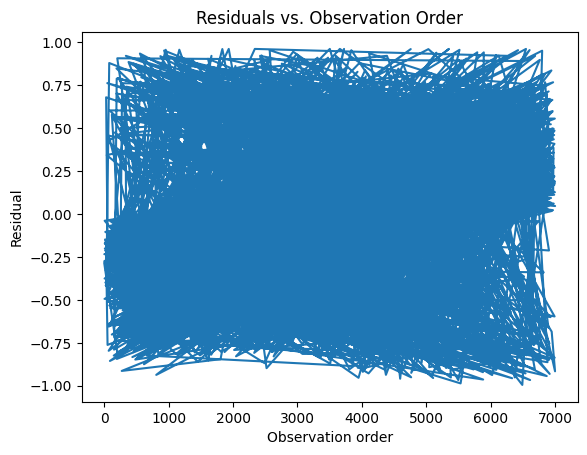

In [37]:

# Get residuals from statsmodels
residuals = optimized_model.resid_response

plt.plot(residuals)
plt.xlabel('Observation order')
plt.ylabel('Residual')
plt.title('Residuals vs. Observation Order')
plt.show()


In [38]:
print(df['IsLuxury_1'].unique())

[0 1]


In [39]:
print(len(df))

7000


In [40]:
# Provide VIF values
X_opt = X_train[variables]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_opt.columns
vif_data['VIF'] = [variance_inflation_factor(X_opt.values, i) for i in range(X_opt.shape[1])]

print(vif_data)

         feature       VIF
0  SquareFootage  5.692973
1   NumBathrooms  5.171180
2    NumBedrooms  5.978887


In [41]:
coefs = optimized_model.params
print(coefs)
equation = "logit(p) = "
for var, coef in coefs.items():
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.4f}*{var}"
equation = equation.replace("+ -", "- ")
print(equation)


const           -5.696277
SquareFootage    0.002004
NumBathrooms     0.661141
NumBedrooms      0.744355
dtype: float64
logit(p) =  - 5.6963*const + 0.0020*SquareFootage + 0.6611*NumBathrooms + 0.7444*NumBedrooms
